In [1]:
import warnings
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import json
import operator
import copy, random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from itertools import cycle
from math import pi


warnings.filterwarnings('ignore')


# Step 0: Provide the path to the experiments

In [2]:
your_path = '/users/andra/Dev'
path = "{}/valentine-paper-results/data/".format(your_path)

# Step 1: Rename files 
> **Note**: Only run this if you have new results

In [3]:
files = []
for folder in os.listdir(path):
    if folder.startswith('.'):
        continue
    for file in os.listdir(path+folder):
        filename = folder+'/'+file
        if filename.endswith(".json"):
            files.append('.'.join(filename.split('.')[:-1]))

for f in files:
    g = f.replace('EmbDI_with_cid_all_with_rid_first_flatten_all_', "EmbDI{'with_cid': 'all', 'with_rid': 'first', 'flatten': 'all'}")
    g = g.replace('evCupid','ev__Cupid')
    g = g.replace('__CorrelationClustering','__DistributionBased')
    g = g.replace('evSimilarityFlooding','ev__SimilarityFlooding')
    g = g.replace('evJaccardLevenMatcher','ev__JaccardLevenMatcher')
    if 'COMA_OPT_INST' in g:
        g = g.replace('__Coma','__COMA-SI')
    else:
        g = g.replace('__Coma','__COMA-S')


#     print(g)
    os.rename(path+f+'.json',path+g+'.json')

# Step 2: Read files


Parse the result files and present a table with the precision and recall metrics for all the experiments

for every algorithm create a plot for each metric

Code below read the output of the framework and creates a dict of metrics.

In [3]:
total_metrics = {}
run_times = {}

def show_the_output(path: str):
    
    with open('%s'%(path),'r') as input:
        split_path = path.split('/')
        filename = '.'.join(split_path[len(split_path)-1].split('.')[:-1])
        lines = json.load(input)
        total_metrics[filename] = lines['metrics']
        run_times[filename] = lines['run_times']['total_time']
        

In [5]:
files = []
for folder in os.listdir(path):
    if folder.startswith('.'):
        continue
    for file in os.listdir("{}{}".format(path, folder)):
        filename = path+folder+'/'+file
        if filename.endswith(".json"):
            files.append(filename)

files.sort()
for file in tqdm(files):
    try:
        show_the_output(file)
    except:
        raise Exception(file)



100%|██████████| 69073/69073 [00:31<00:00, 2163.31it/s]


# Step 3: Create data

In [6]:
def find_best_config_dict(source_dict: dict, target_dict: dict, to_table: dict):
    for key in source_dict.keys():
        for algo in source_dict[key].keys():
            max_item = max(source_dict[key][algo].items(), key=operator.itemgetter(1))
            target_dict[key][algo] = max_item[0]
            to_table[key][algo] = max_item[1]

def get_best_metric(source_dict: dict, target_dict: dict, index):
    for key in source_dict.keys():
        for algo in source_dict[key].keys():
            target_dict[key][algo] = source_dict[key][algo][index[key][algo]]
            
def add_variable_columns(frame: pd.DataFrame, category: list, mother_table: list, way: list, 
                         horizontal_overlap: list, vertical_overlap: list, column_names: list, typeOfValues: list):
    frame['Category'] = category
    frame['MotherTable'] = mother_table
    frame['SplitMethod'] = way
    frame['HorizontalOverlap'] = horizontal_overlap
    frame['VerticalOverlap'] = vertical_overlap
    frame['ColumnNames'] = column_names
    frame['TypeOfValues'] = typeOfValues

In [7]:
pd.set_option('display.max_rows', 500)
pd.options.display.max_colwidth = -1


precision = {}
recall = {}
f1_score = {}
precision_at_10_percent = {}
precision_at_20_percent = {}
precision_at_30_percent = {}
precision_at_40_percent = {}
precision_at_50_percent = {}
precision_at_60_percent = {}
precision_at_70_percent = {}
precision_at_80_percent = {}
precision_at_90_percent = {}
recall_at_sizeof_ground_truth = {}
run_time = {}

 
algorithms = {
    'Cupid': None,
    'DistributionBased': None,
    'SimilarityFlooding': None,
    'SemProp': None,
    'JaccardLevenMatcher':None,
    'COMA-S': None,
    'COMA-SI': None,
    'EmbDI': None
}

problem_dictionary = {
    'Unionable': ['horizontal','unionable'],
    'View-Unionable': ['both_0_', 'viewunion'],
    'Joinable': ['both_50_', 'vertical','_joinable'],
    'Semantically-Joinable': ['both_50_','vertical','_semjoinable'] # TODO: change with the correct file convention
}



for key in total_metrics.keys():
    precision[key.split('__')[0]] = {}
    recall[key.split('__')[0]] = {}
    f1_score[key.split('__')[0]] = {}
    precision_at_10_percent[key.split('__')[0]] = {}
    precision_at_20_percent[key.split('__')[0]] = {}
    precision_at_30_percent[key.split('__')[0]] = {}
    precision_at_40_percent[key.split('__')[0]] = {}
    precision_at_50_percent[key.split('__')[0]] = {}
    precision_at_60_percent[key.split('__')[0]] = {}
    precision_at_70_percent[key.split('__')[0]] = {}
    precision_at_80_percent[key.split('__')[0]] = {}
    precision_at_90_percent[key.split('__')[0]] = {}
    recall_at_sizeof_ground_truth[key.split('__')[0]] = {}
    run_time[key.split('__')[0]] = {}

        
for key in total_metrics.keys():
    if not "precision_at_n_percent" in total_metrics[key].keys():
#         print(key)
#         print(key.split('__')[1].split('{')[0])
        precision[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        f1_score[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        recall[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_10_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_20_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_30_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_40_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_50_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_60_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_70_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_80_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_90_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        recall_at_sizeof_ground_truth[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        run_time[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}


for key in total_metrics.keys():
    if not "precision_at_n_percent" in total_metrics[key].keys():
        precision[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision']
        recall[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['recall']
        f1_score[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['f1_score']
        precision_at_10_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_10_percent']
        precision_at_20_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_20_percent']
        precision_at_30_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_30_percent']
        precision_at_40_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_40_percent']
        precision_at_50_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_50_percent']
        precision_at_60_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_60_percent']
        precision_at_70_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_70_percent']
        precision_at_80_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_80_percent']
        precision_at_90_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_90_percent']
        recall_at_sizeof_ground_truth[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['recall_at_sizeof_ground_truth']
        run_time[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = run_times[key]


best_dict = {}
for dataset in precision.keys():
    best_dict[dataset] = copy.deepcopy(algorithms)
       
best_table = copy.deepcopy(best_dict)
find_best_config_dict(f1_score,best_dict,best_table)

# print('\n\nBest Configuration 1-1\n')
best_configuration_121 = pd.DataFrame.from_dict(best_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
# display(best_configuration_121)

# print('\n\nPrecision\n')
best_prec_dict = copy.deepcopy(best_dict)
get_best_metric(precision,best_prec_dict,best_dict)
# display(best_prec_dict)
best_prec_pd = pd.DataFrame.from_dict(best_prec_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
best_prec_pd.fillna(value=pd.np.nan, inplace=True)
shape = best_prec_pd.shape
random_list = np.random.uniform(low=0, high=1, size=shape[0])
for i in best_prec_pd.columns:
    m = best_prec_pd[i].isnull()
    #count rows with NaNs
    l = m.sum()
    #create array with size l
    s = np.random.choice(random_list, size=l)
    #set NaNs values
    best_prec_pd.loc[m, i] = s
    

category = []
mother_table = []
way = []
column_names = []
typeOfValues = []
horizontal_overlap = []
vertical_overlap = []

for index, dataset in best_prec_pd.loc[:,['Dataset']].iterrows():
    for problem in problem_dictionary.keys():
        for ss in problem_dictionary[problem]:
            if ss in dataset['Dataset']:
                if (problem == 'Joinable' and '_ev' in dataset['Dataset']) or 'Musicians' in dataset['Dataset']:
                    category.append(problem)
                elif (problem == 'Semantically-Joinable' and '_av' in dataset['Dataset']) or 'Musicians' in dataset['Dataset']:
                    category.append(problem)
                elif not (problem == 'Joinable' or problem == 'Semantically-Joinable'):
                    category.append(problem)
            
    variables = dataset['Dataset'].split('_')
#     print(variables)
#     print(variables[1] == 'both')
    mother_table.append(variables[0])
    if variables[1] == 'both':
        way.append(variables[1])
        horizontal_overlap.append(variables[2])
        vertical_overlap.append(variables[3])
        column_names.append(variables[4])
        typeOfValues.append(variables[5])
    elif variables[1] == 'horizontal':
        way.append(variables[1])
        horizontal_overlap.append(variables[2])
        vertical_overlap.append(None)
        column_names.append(variables[3])
        typeOfValues.append(variables[4])
    elif variables[1] == 'vertical':
        way.append(variables[1])
        horizontal_overlap.append(None)
        vertical_overlap.append(variables[2])
        column_names.append(variables[3])
        typeOfValues.append(variables[4])
    else:
        way.append(None)
        horizontal_overlap.append(None)
        vertical_overlap.append(None)
        column_names.append(None)
        typeOfValues.append(None)

add_variable_columns(best_prec_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec_pd)

# print('\n\nRecall\n')
best_recall_dict = copy.deepcopy(best_dict)
get_best_metric(recall,best_recall_dict,best_dict)
best_recall_pd = pd.DataFrame.from_dict(best_recall_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_recall_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_recall_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_recall_pd)

# print('\n\nF1_score\n')
best_f1_dict = copy.deepcopy(best_dict)
get_best_metric(f1_score,best_f1_dict,best_dict)
best_f1_pd = pd.DataFrame.from_dict(best_f1_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_f1_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_f1_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_f1_pd)

nm_table = copy.deepcopy(best_dict)
nm_dict = copy.deepcopy(best_dict)
find_best_config_dict(recall_at_sizeof_ground_truth,nm_dict,nm_table)

# print('\n\nBest Configuration n-m\n')
best_configuration_nm = pd.DataFrame.from_dict(nm_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
# display(best_configuration_nm)

# print('\n\nPrecision at 10 percent\n')
best_prec10_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_10_percent,best_prec10_dict,nm_dict)
best_prec10_pd = pd.DataFrame.from_dict(best_prec10_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec10_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec10_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec10_pd)

# print('\n\nPrecision at 20 percent\n')
best_prec20_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_20_percent,best_prec20_dict,nm_dict)
best_prec20_pd = pd.DataFrame.from_dict(best_prec20_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec20_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec20_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec20_pd)

# print('\n\nPrecision at 30 percent\n')
best_prec30_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_30_percent,best_prec30_dict,nm_dict)
best_prec30_pd = pd.DataFrame.from_dict(best_prec30_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec30_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec30_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec30_pd)

# print('\n\nPrecision at 40 percent\n')
best_prec40_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_40_percent,best_prec40_dict,nm_dict)
best_prec40_pd = pd.DataFrame.from_dict(best_prec40_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec40_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec40_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec40_pd)

# print('\n\nPrecision at 50 percent\n')
best_prec50_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_50_percent,best_prec50_dict,nm_dict)
best_prec50_pd = pd.DataFrame.from_dict(best_prec50_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec50_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec50_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec50_pd)

# print('\n\nPrecision at 60 percent\n')
best_prec60_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_60_percent,best_prec60_dict,nm_dict)
best_prec60_pd = pd.DataFrame.from_dict(best_prec60_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec60_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec60_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec60_pd)

# print('\n\nPrecision at 70 percent\n')
best_prec70_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_70_percent,best_prec70_dict,nm_dict)
best_prec70_pd = pd.DataFrame.from_dict(best_prec70_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec70_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec70_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec70_pd)

# print('\n\nPrecision at 80 percent\n')
best_prec80_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_80_percent,best_prec80_dict,nm_dict)
best_prec80_pd = pd.DataFrame.from_dict(best_prec80_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec80_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec80_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec80_pd)

# print('\n\nPrecision at 90 percent\n')
best_prec90_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_90_percent,best_prec90_dict,nm_dict)
best_prec90_pd = pd.DataFrame.from_dict(best_prec90_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec90_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec90_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_prec90_pd)

# print('\n\nRecall at sizeof groundtruth\n')
best_rec_gnd_pd = pd.DataFrame.from_dict(nm_table, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_rec_gnd_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_rec_gnd_pd.fillna(value=pd.np.nan, inplace=True)
# display(best_rec_gnd_pd)

best_run_time = copy.deepcopy(nm_dict)
get_best_metric(run_time, best_run_time, nm_dict)
best_run_time_pd = pd.DataFrame.from_dict(best_run_time, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_run_time_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)


# Step 4: Utils for plots

In [8]:
def split_data_by_type(dataframe, config):
    jdf = dataframe[dataframe['Category']==config['problem']]
    result = None
    
    for c in config["split"]:
        df = jdf.drop(c['drop_alg'], axis=1)
        
        if config['problem'] == "Joinable" or config['problem'] == "View-Unionable":
            df.loc[df['TypeOfValues'].isnull(), 'TypeOfValues'] = 'ev'
        else:
            df.loc[df['TypeOfValues'].isnull(), 'TypeOfValues'] = 'av'
            
        df['SplitType'] = df[c['type']]

        if c['type'] == "ColumnNames":
            df.loc[df['SplitType'] != 'ec', 'SplitType'] = 'Noisy Schemata'
            df.loc[df['SplitType'] == 'ec', 'SplitType'] = 'Verbatim Schemata'
        else:
            df.loc[df['SplitType'] == 'av', 'SplitType'] = 'Noisy Instances'
            df.loc[df['SplitType'] == 'ev', 'SplitType'] = 'Verbatim Instances'
        
        df = df.drop(c['drop'], axis=1)
        df1 = pd.melt(df, ['SplitType', 'MotherTable'], var_name="Algorithms")
        
        if result is None:
            result = df1
        else:
            result = pd.concat([result, df1])        
      
    return result


In [292]:
def make_data_final_plot(dataframe, instance, schema, config):
    data = split_data_by_type(dataframe, config)
    d_inst = data[data['Algorithms'].isin(instance)]
    d_inst = d_inst.drop(d_inst[d_inst['MotherTable'] == 'Musicians'].index) # No wikidata

    d_sch = data[data['Algorithms'].isin(schema)]
    d_sch = d_sch.drop(d_sch[d_sch['MotherTable'] == 'Musicians'].index) # No wikidata
            
    ds = dataframe.drop(['Dataset', 'Cupid', 'DistributionBased', 'SimilarityFlooding', 'JaccardLevenMatcher',
                         'COMA-S', 'COMA-SI', 'EmbDI', 'SplitMethod', 'HorizontalOverlap', 'VerticalOverlap'], axis=1)
    ds = ds[ds['Category'] == config['problem']].drop(['Category'], axis=1)
    ds = ds[ds['MotherTable'] == 'assays']
    ds['SplitType'] = ['Verbatim Instances/Schemata' if 'ec' in el['ColumnNames'] and el['TypeOfValues'] == 'ev' 
                       else 'Noisy Instances/Schemata' for i, el in ds[['TypeOfValues', 'ColumnNames']].iterrows()] 
    ds = ds.drop(['ColumnNames', 'TypeOfValues', 'MotherTable'], axis=1)
    ds = pd.melt(ds, ['SplitType'], var_name="Algorithms")
    
    dedi = data[data['Algorithms'] == 'EmbDI']
    dedi = dedi.drop(dedi[dedi['MotherTable'] == 'Musicians'].index) # No wikidata
    dedi = dedi.drop(['MotherTable'], axis=1)
    dedi.loc[dedi['SplitType'] == 'Verbatim Instances', 'SplitType'] = 'Verbatim Instances/Schemata'
    dedi.loc[dedi['SplitType'] == 'Noisy Instances', 'SplitType'] = 'Noisy Instances/Schemata'
#     minidf = pd.DataFrame([['Noisy Instances/Schemata', 'EmbDI', 0]], columns=['SplitType', 'Algorithms', 'value'])
#     dedi = dedi.append(minidf)
#     dedi = dedi.reset_index().drop(['index'], axis=1)

    d_hybrid = pd.concat([dedi, ds])
        
    return d_inst, d_sch, d_hybrid

In [10]:
def barplots_one_row(dataframe, title):
    sns.set(style="whitegrid", font_scale=1.7)
    init_plot = True
    
    xtick_names = {
        'DistributionBased': 'DB',
        'JaccardLevenMatcher': 'JL', 
        'Cupid': 'CU', 
        'SimilarityFlooding': 'SF', 
        'SemProp': 'SP', 
        'COMA-SI': 'COI', 
        'COMA-S': 'COS',
        'EmbDI': 'EDI'
    }
    
    mins = list()
    
    pal = sns.color_palette("Set2")
    
    musicians = dataframe[dataframe['MotherTable'] == 'Musicians']
    problems = dataframe['Problem'].unique()

    if init_plot:
        fig, axs = plt.subplots(1, len(problems), figsize=(25, 5))
        init_plot = False

    min_val = musicians['value'].min()

    for i, p in enumerate(problems):
        df = musicians[musicians['Problem']==p]
        df = df.reset_index()
        

        if all(df[df['Algorithms'] == 'SemProp']['value'].isnull()):
            df = df.drop(df[df['Algorithms'] == 'SemProp'].index)

        if len(df['Algorithms'].unique()) > 6:
            sns.barplot(x="Algorithms", y="value", data=df, ax=axs[i], 
                        palette=[pal[0], pal[1], pal[2], pal[6], pal[3], pal[4], pal[5]],
                       order=['DistributionBased', 'JaccardLevenMatcher', 'COMA-SI', 'EmbDI', 'Cupid', 
                              'SimilarityFlooding', 'COMA-S'])
        else:
            sns.barplot(x="Algorithms", y="value", data=df, ax=axs[i], 
                        palette=[pal[0], pal[1], pal[2], pal[3], pal[4], pal[5]],
                       order=['DistributionBased', 'JaccardLevenMatcher', 'COMA-SI', 'EmbDI', 'Cupid', 
                              'SimilarityFlooding', 'COMA-S'])

        labels = [xtick_names[l.get_text()] for l in axs[i].get_xticklabels()]
        axs[i].set_xticklabels(labels)
        axs[i].set_title("{}".format(p), size=25, pad=17)
        axs[i].set_xlabel('') # X label
        axs[i].tick_params(axis='both', which='major', labelsize=15)
        axs[i].set_ylim((0, 1))
        axs[i].yaxis.set_major_locator(MultipleLocator(0.125))

        if i == 0:
            axs[i].set_ylabel(title, fontsize = 22, labelpad=10) # Y label
        else:
            axs[i].set_ylabel('') # Y label

    # hack to add the legend
    plt.plot([], [], ' ', label="DB - DistributionBased")
    plt.plot([], [], ' ', label="JL - JaccardLevenMatcher")
    plt.plot([], [], ' ', label="CU - Cupid")
    plt.plot([], [], ' ', label="SF - SimilarityFlooding")
    plt.plot([], [], ' ', label="COS - COMA-Schema")
    plt.plot([], [], ' ', label="COI - COMA-Instance")
    plt.plot([], [], ' ', label="EDI - EmbDI")


    plt.legend(bbox_to_anchor=(-1.4, -0.25), loc=8, borderaxespad=0., ncol=7, handlelength=0.1, handletextpad=0.3)
    plt.savefig('plots/Musicians.pdf', dpi=300, bbox_inches = "tight")

In [366]:
xtick_names = {
    'DistributionBased': 'DB',
    'JaccardLevenMatcher': 'JL', 
    'Cupid': 'CU', 
    'SimilarityFlooding': 'SF', 
    'SemProp': 'SP', 
    'COMA-SI': 'COI', 
    'COMA-S': 'COS',
    'EmbDI': 'EDI'
}


medianprops=dict(linewidth=3.5)
current_palette = sns.color_palette('colorblind')


def plot_by_data_type(data_index, xlabel_order, colors, pattern, plot_name, hue_order, cpmap):
    cols = 4
    fig, axe = plt.subplots(1, cols, figsize=(30, 5), sharey=True)
    plt.rcParams["legend.facecolor"] = 'white'
    sns.set(style="whitegrid", font_scale=2)

    ylabel = 'Recall at size of\nground truth'

   
    instance_handles = list()
    instance_labels = list()

    # instance algorithms and plots
    for i, p in enumerate(big_df.keys()):
        
        dd = big_df[p][data_index]
        if data_index == 1: # we don't display the verbatim schemata for schema based because all values eq 1
            dd = dd.drop(dd[dd['SplitType'] == 'Verbatim Schemata'].index) # No verbatim schemata

        # make the bars same size for any case
        if len(dd['Algorithms'].unique()) == 2:
            inst_bars = sns.boxplot(x="Algorithms", y="value", data=dd, saturation=.5, width=0.55,
                        hue='SplitType', hue_order=hue_order, palette=colors, ax=axe[i],
                                   medianprops=medianprops,
                                   order=xlabel_order)
        elif len(dd['SplitType'].unique()) > 1:
            inst_bars = sns.boxplot(x="Algorithms", y="value", data=dd, saturation=.5,
                        hue='SplitType', hue_order=hue_order, palette=colors, ax=axe[i],
                                   medianprops=medianprops,
                                   order=xlabel_order)
        elif any('Noisy Schemata' in a for a in dd['SplitType'].unique()):
            inst_bars = sns.boxplot(x="Algorithms", y="value", data=dd, saturation=.5, width=0.4,
                        hue='SplitType', hue_order=hue_order, palette=[colors[1]], ax=axe[i],
                                    medianprops=medianprops, 
                                    order=xlabel_order)
        elif any('Noisy Instances' in a for a in dd['SplitType'].unique()):
            inst_bars = sns.boxplot(x="Algorithms", y="value", data=dd, saturation=.5,
                        hue='SplitType', hue_order=hue_order, palette=[colors[0]], ax=axe[i],
                                    medianprops=medianprops, 
                                    order=xlabel_order)
        else:
            inst_bars = sns.boxplot(x="Algorithms", y="value", data=dd, saturation=.5,
                        hue='SplitType', hue_order=hue_order, palette=[colors[1]], ax=axe[i],
                                    medianprops=medianprops, 
                                    order=xlabel_order)
            

        axe[i].set_title(p, fontsize=25, pad=20)

        # find the plots that have the maximum columns to show it in the legend
        h, l = axe[i].get_legend_handles_labels()
        if len(h) > len(instance_handles):
            instance_handles = h
            instance_labels = l

        # add the corresponding patterns to the legend
        len_bars = len(inst_bars.patches)
        for i, bar in enumerate(inst_bars.patches):
            if i < len_bars / 2:
                bar.set_hatch(pattern[0])
            else:
                bar.set_hatch(pattern[1])

        # add patterns to the boxes
        cycle_pattern = cycle(pattern)
        for i, bar in enumerate(inst_bars.artists):
            c = bar.get_facecolor()
            hatch = list(filter(lambda e: e[0] - c[0] < 0.1, cpmap.keys()))[0]
            bar.set_hatch(cpmap[hatch])

    # if all plots have only one type of bars, show the last one in the legend
    if instance_handles is None:
        instance_handles = h
    if instance_labels is None:
        instance_labels = l

    for i in range(0, cols):
        # add the ticklabels for the algorithms
        ticklabels = [xtick_names[l.get_text()] for l in axe[i].get_xticklabels()]
        axe[i].set_xticklabels(ticklabels)

        # remove the ylabel from everywhere except the first column
        # remove all the legends
        axe[i].set_ylabel('')
        axe[i].set_xlabel('')
        axe[i].get_legend().remove() 

    axe[0].set_ylabel(ylabel, fontsize=25)

    # hack to add the legend
    if data_index == 0:
        axe[1].legend(instance_handles, instance_labels, bbox_to_anchor=(0.3, -0.4), loc=4, 
                      borderaxespad=0., ncol=2)
        plt.plot([], [], ' ', label="DB - DistributionBased")
        plt.plot([], [], ' ', label="JL - JaccardLevenMatcher")
        plt.plot([], [], ' ', label="COI - COMA-Instance")
        
        hh, ll = plt.gca().get_legend_handles_labels()
        legend = plt.legend(hh[0:-2], ll[0:-2], bbox_to_anchor=(0.5, -0.4), loc=4, borderaxespad=0., ncol=6, 
               handlelength=0.1, handletextpad=0.1)
    elif data_index == 1:
        axe[1].legend(instance_handles, instance_labels, bbox_to_anchor=(-0.4, -0.4), loc=4, 
                      borderaxespad=0., ncol=2)
        plt.plot([], [], ' ', label="CU - Cupid")
        plt.plot([], [], ' ', label="SF - SimilarityFlooding")
        plt.plot([], [], ' ', label="COS - COMA-Schema")
        
        hh, ll = plt.gca().get_legend_handles_labels()
        legend = plt.legend(hh[0:-1], ll[0:-1], bbox_to_anchor=(-0.6, -0.4), loc=4, borderaxespad=0., ncol=6, 
                   handlelength=0.1, handletextpad=0.1)
    else:
        axe[1].legend(instance_handles, instance_labels, bbox_to_anchor=(0.8, -0.4), loc=4, 
                      borderaxespad=0., ncol=4)
        plt.plot([], [], ' ', label="EDI - EmbDI")
        plt.plot([], [], ' ', label="SP - SemProp")

        hh, ll = plt.gca().get_legend_handles_labels()
        legend = plt.legend(hh[0:-2], ll[0:-2], bbox_to_anchor=(-0.2, -0.4), loc=4, borderaxespad=0., ncol=6, 
                   handlelength=0.1, handletextpad=0.1)

    fig.subplots_adjust(wspace=0.01, hspace=0.25)

    plt.savefig('plots/{}.pdf'.format(plot_name), dpi=300, bbox_inches = "tight")



In [12]:
def make_spiders(df, fig, ax, title, colors, runtime, legend=True):
    cat_dict = {
        'View-Unionable': 'VU',
        'Unionable': 'U', 
        'Semantically-Joinable': 'SJ',
        'Joinable': 'J',
        'Runtime': 'RT'
    }
    
    title_dict = {
        'ac': 'Noisy Schemata',
        'av': 'Noisy Instances',
        'ec': 'Verbatim Schemata', 
        'ev': 'Verbatim Instances'
    }

    df = pd.merge(df, runtime, left_index=True, right_index=True)
    
    categories=list(df)
    categories = list(map(lambda l: cat_dict[l], categories))
    
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks(np.arange(0.2, 1, 0.2))
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontdict={'fontweight': 15})
    ax.set_ylim(0,1)

    df.reset_index(inplace=True)

    for i, alg in enumerate(df['Algorithms'].unique()):
        values = df.loc[i].drop('Algorithms').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=3, linestyle='solid', label=alg, color=colors[i])
    
    ax.set_title(title_dict[title], pad=15, fontdict={'fontsize': 18})
   
    # Add legend
    if legend:
        ax.legend(loc='lower left', bbox_to_anchor=(-0.08, -0.25), ncol=4)
    
    if title == 'ac':
        ax.legend(loc='lower left', bbox_to_anchor=(-0.3, -0.25), ncol=3)


In [13]:
def make_data_spider_plot(dataframe):
    df = dataframe.drop(['MotherTable', 'SplitMethod', 'HorizontalOverlap', 'VerticalOverlap'], axis=1)
    # rtdf = best_run_time_pd.drop(['Category', 'MotherTable', 'SplitMethod', 
    #                        'HorizontalOverlap', 'VerticalOverlap', 'ColumnNames', 'TypeOfValues'], axis=1)

    # rtdf = rtdf.rename(columns={"Cupid": "RT_CU", "DistributionBased": "RT_DB", "SimilarityFlooding": "RT_SF",
    #                                 "SemProp": "RT_SP", "JaccardLevenMatcher": "RT_JL", "COMA-S": "RT_COS",
    #                                 "COMA-SI": "RT_COI"})

    sch = df.drop(['Dataset', 'DistributionBased', 'JaccardLevenMatcher', 'COMA-SI', 'SemProp', 'EmbDI', 'TypeOfValues'], axis=1)
    #               'RT_DB', 'RT_JL', 'RT_COI', 'RT_SP'], axis=1)
    inst = df.drop(['Dataset', 'Cupid', 'SemProp', 'SimilarityFlooding', 'COMA-S', 'ColumnNames'], axis=1)
    #                'RT_CU', 'RT_SP', 'RT_SF', 'RT_COS'], axis=1)

    inst.loc[(inst['TypeOfValues'].isnull() & 
              inst['Category'].isin(['Joinable', 'View-Unionable'])), 'TypeOfValues'] = 'ev'
    inst.loc[inst['TypeOfValues'].isnull(), 'TypeOfValues'] = 'av'

    sch.loc[sch['ColumnNames'].isnull(), 'ColumnNames'] = 'ac'
    sch.loc[sch['ColumnNames'] != 'ec', 'ColumnNames'] = 'ac'

    inst_m = pd.melt(inst, ['Category', 'TypeOfValues'], var_name='Algorithms')
    sch_m = pd.melt(sch, ['Category', 'ColumnNames'], var_name='Algorithms')
    
    return inst_m, sch_m


def print_spider_plot(dataframe):
    inst_m, sch_m = make_data_spider_plot(best_rec_gnd_pd)
    
    sns.set(style="whitegrid", font_scale=1.4)
    fig, ax = plt.subplots(ncols=3, subplot_kw={'projection': 'polar', 'axisbelow': False}, figsize=(20, 10), )
    fig.subplots_adjust(wspace=0.25)

    palette = sns.color_palette('Set2')
    colorblind = sns.color_palette('colorblind')
    color_inst = ['green', palette[1], palette[5], '#d05ef2', ]
    color_sch = [colorblind[6], palette[0], 'blue']

    runtime_index_inst = {
        'Algorithms': ['JaccardLevenMatcher', 'DistributionBased', 'COMA-SI', 'EmbDI'],
        'Runtime': [1, 0.66, 0.66, 1]
    }

    runtime_index_sch = {
        'Algorithms': ['SimilarityFlooding', 'Cupid', 'COMA-S'],
        'Runtime': [0.33, 0.33, 0.33]
    }

    ### Instance based algorithms
    for i, cat in enumerate(inst_m['TypeOfValues'].unique()):
        inst_df = inst_m[inst_m['TypeOfValues'] == cat].drop(['TypeOfValues'], axis=1)
        inst_df = inst_df.groupby(['Algorithms', 'Category'])['value'].aggregate('median').unstack()

        if i % 2 == 1:
            legend = False
        else:
            legend = True
        make_spiders(inst_df, fig, ax[i], cat, color_inst,
                     pd.DataFrame.from_dict(runtime_index_inst).set_index('Algorithms'), legend)

        
    ### Schema based algorithms
    # for i, cat in enumerate(sch_m['ColumnNames'].unique()):
    cat = 'ac'
    sch_m_ac = sch_m[sch_m['ColumnNames'] == cat].drop(['ColumnNames'], axis=1)
    sch_m_ac = sch_m_ac.groupby(['Algorithms', 'Category'])['value'].aggregate('median').unstack()

    # if i % 2 == 1:
    #     legend = False
    # else:
    #     legend = True
    make_spiders(sch_m_ac, fig, ax[2], cat, color_sch, 
                 pd.DataFrame.from_dict(runtime_index_sch).set_index('Algorithms'))

    # hack to print and extra plot
    ax[1].plot([], [], ' ', label="VU - View-Unionable")
    ax[1].plot([], [], ' ', label="U - Unionable")
    ax[1].plot([], [], ' ', label="SJ - Semantically-Joinable")
    ax[1].plot([], [], ' ', label="J - Joinable")
    ax[1].plot([], [], ' ', label="RT - Runtime")
    h, l = ax[1].get_legend_handles_labels()
    ax[1].legend(h[4:], l[4:], bbox_to_anchor=(1.9, -0.35), loc=4, borderaxespad=0., ncol=5)

    plt.savefig('plots/radar-spider.pdf', dpi=300, bbox_inches = "tight")

# Step 5: Visualize

In [367]:
config = dict()
with open("config-by-data-type.json", "r") as fp:
    config = json.load(fp)
config = config['config']


In [368]:
df1 = None
name1 = 'recall_gt_'
title1 = "Recall at size of ground truth"
for c in config:
    data1 = split_data_by_type(best_rec_gnd_pd, c)
    data1['Problem'] = c['problem']

    if df1 is None:
        df1 = data1
    else:
        df1 = pd.concat([df1, data1])


In [369]:
problems = ['Unionable', 'View-Unionable', 'Joinable', 'Semantically-Joinable']

instance_order = ['DistributionBased', 'JaccardLevenMatcher', 'COMA-SI']
schema_order = ['Cupid', 'SimilarityFlooding', 'COMA-S']
hybrid_order = ['EmbDI', 'SemProp']

schema_colors = [current_palette[4], current_palette[8]]
instance_colors = [current_palette[6], current_palette[9]]
hybrid_colors = [current_palette[6], current_palette[9], '#d8f545', '#d05ef2']

map_hybrid = {
    current_palette[6]: '\\',
    current_palette[9]: 'o'
}

map_instance = {
    current_palette[6]: '/',
    current_palette[9]: 'o'
}

map_schema = {
    current_palette[4]: '\\',
    current_palette[8]: '.'
}

hatches_sch = ['\\', '.']
hatches_inst = ['/', 'o']
hatches_hybrid = ['\\', 'o']

hue_order_hybrid = ['Noisy Instances/Schemata', 'Verbatim Instances/Schemata']
hue_order_inst = ['Noisy Instances', 'Verbatim Instances']
hue_order_sch = ['Noisy Schemata']

df = best_rec_gnd_pd.copy()

big_df = dict()
for c in config:
    big_df[c['problem']] = make_data_final_plot(df, instance, schema, c)



NameError: name 'print_spider_plot' is not defined

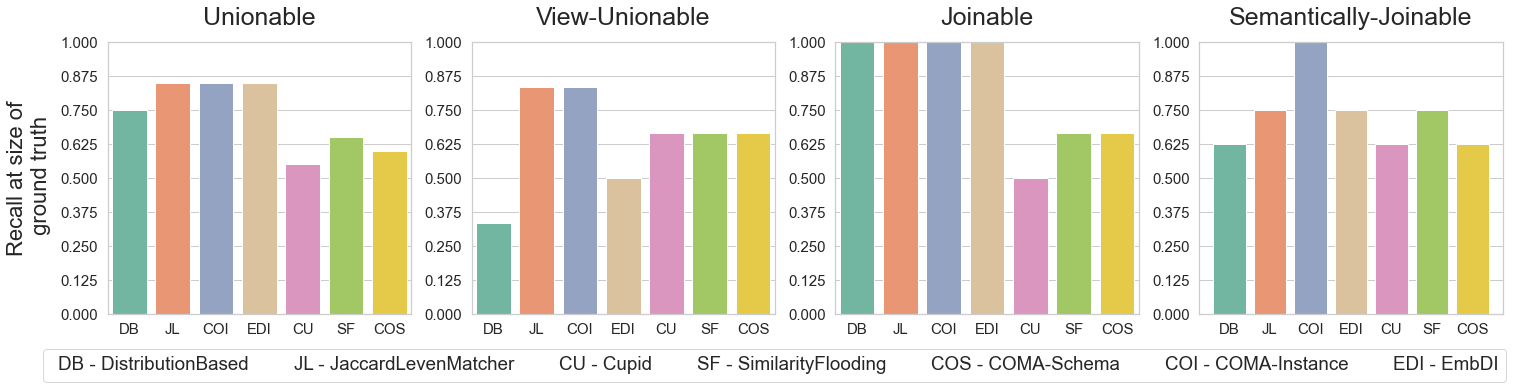

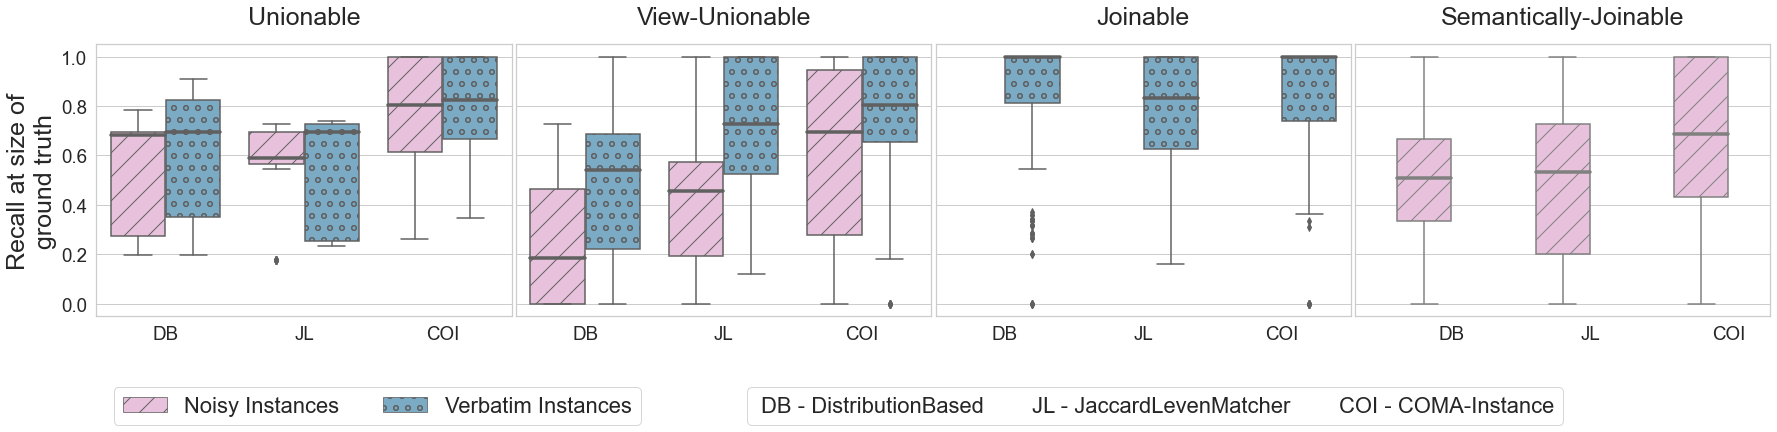

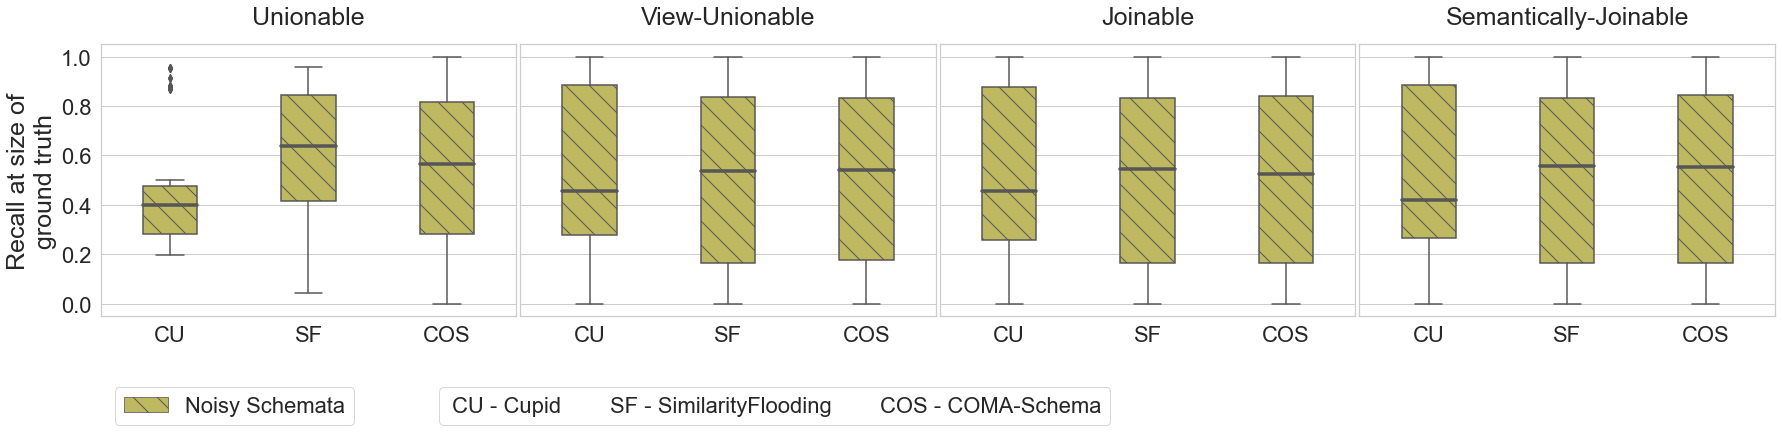

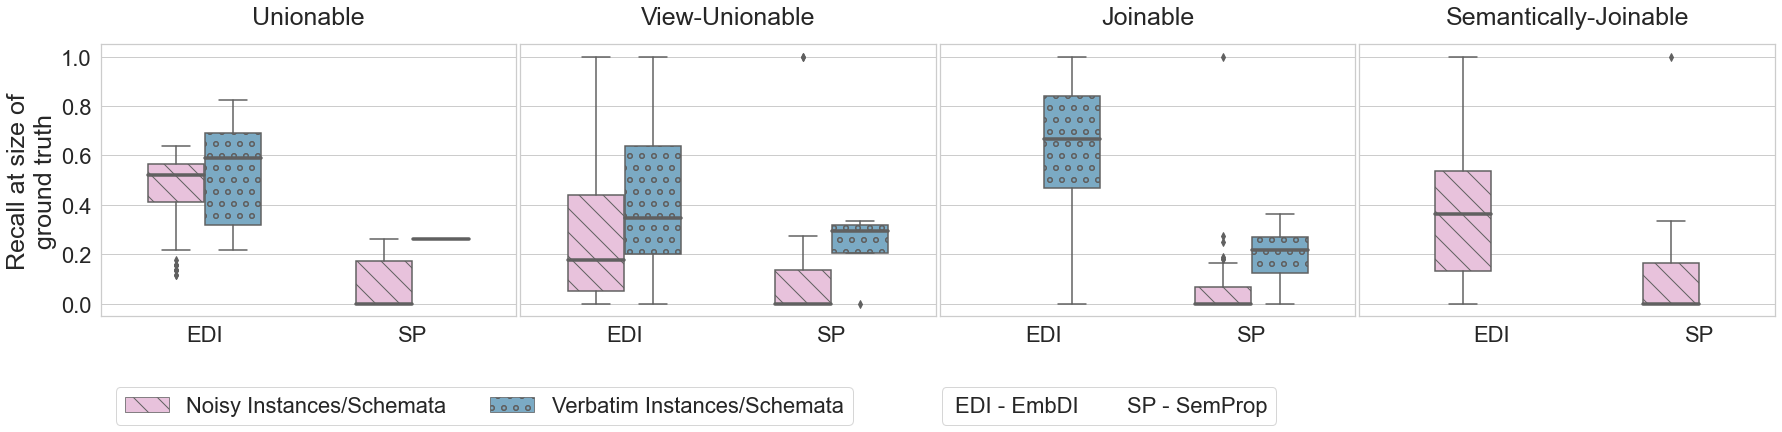

In [370]:
df = df1
title1 = "Recall at size of\n ground truth"
title2 = "F1-Score"
barplots_one_row(df, title1)

plot_by_data_type(0, instance_order, instance_colors, hatches_inst, 'instance-based', hue_order_inst, map_instance)
plot_by_data_type(1, schema_order, schema_colors, hatches_sch, 'schema-based', hue_order_sch, map_schema)
plot_by_data_type(2, hybrid_order, hybrid_colors, hatches_hybrid, 'hybrid', hue_order_hybrid, map_hybrid)

sns.set(style="whitegrid", font_scale=1.6)
print_spider_plot(best_rec_gnd_pd)